In [25]:
import warnings
warnings.filterwarnings('ignore')


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
import sys
import os

path= "C:\\Users\\Aman\\Desktop\\kifyaw8-9\\src"
sys.path.append(os.path.abspath(path=path))

try:
    from data_preprocessing import DataPreprocessing
except:
    print("Import failure")


In [28]:
df = pd.read_csv("C:\\Users\\Aman\\Desktop\\kifyaw8-9\\data\\Fraud_Data.csv")
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [30]:
df.isna().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [31]:
preprocessing = DataPreprocessing(df)

In [32]:
# changing to date time object
df = preprocessing.to_date(['signup_time','purchase_time'])

univariant and bivariant analysis

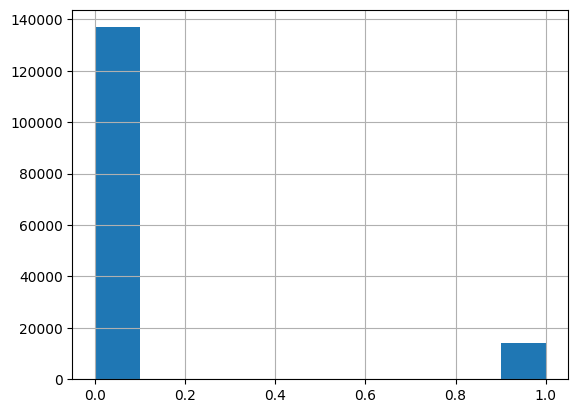

In [33]:
df['class'].hist()
plt.show()

<module 'matplotlib.pyplot' from 'c:\\Users\\Aman\\Desktop\\kifyaw8-9\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

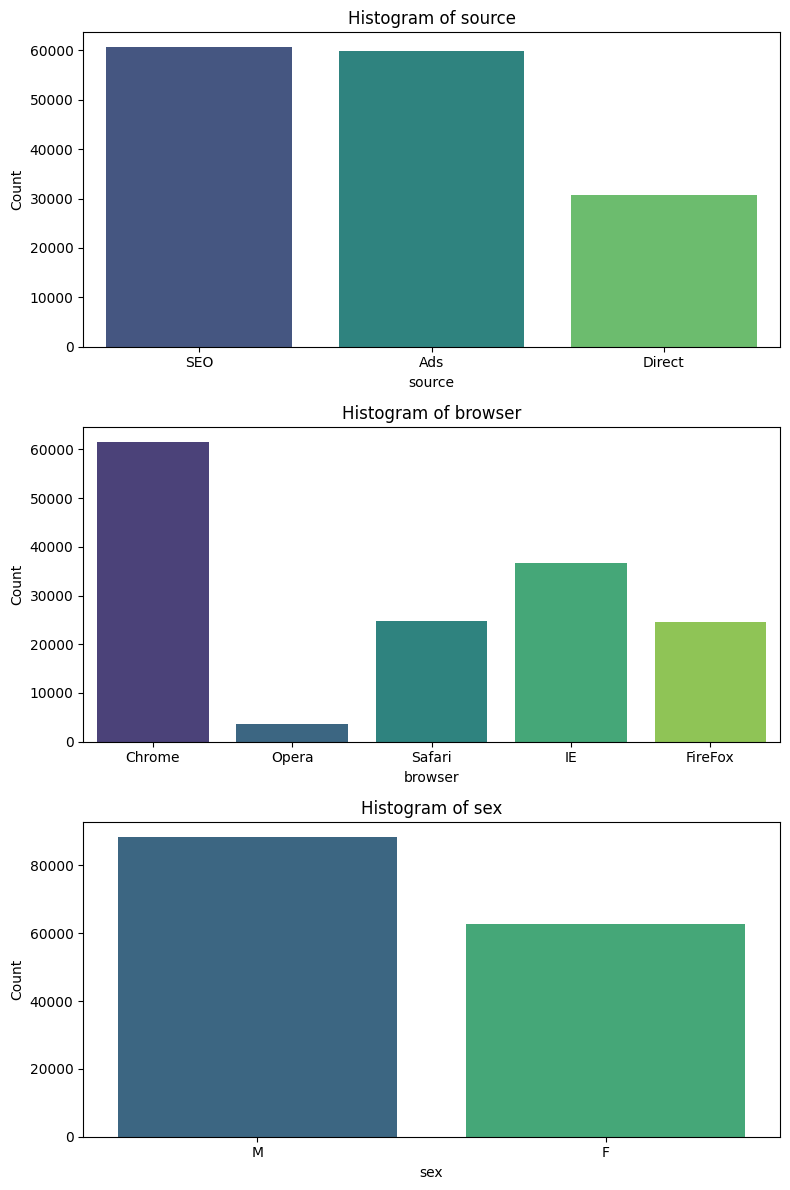

In [34]:
categorical_columns =  df.select_dtypes(include=['object']).columns
preprocessing.hist_plot(categorical_columns[1:]) #Excluding the divice id 

Text(0.5, 1.0, 'Boxplot of purchase_value')

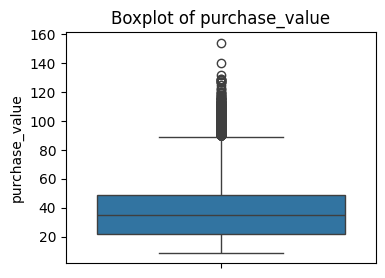

In [35]:
plt.figure(figsize=(4,3))
sns.boxplot(df['purchase_value'])
plt.title("Boxplot of purchase_value")

In [44]:
df_grouped = df.groupby(df['purchase_time'].dt.to_period('M'))['class'].sum().reset_index()
df_grouped['purchase_time'] = df_grouped['purchase_time'].astype(str)

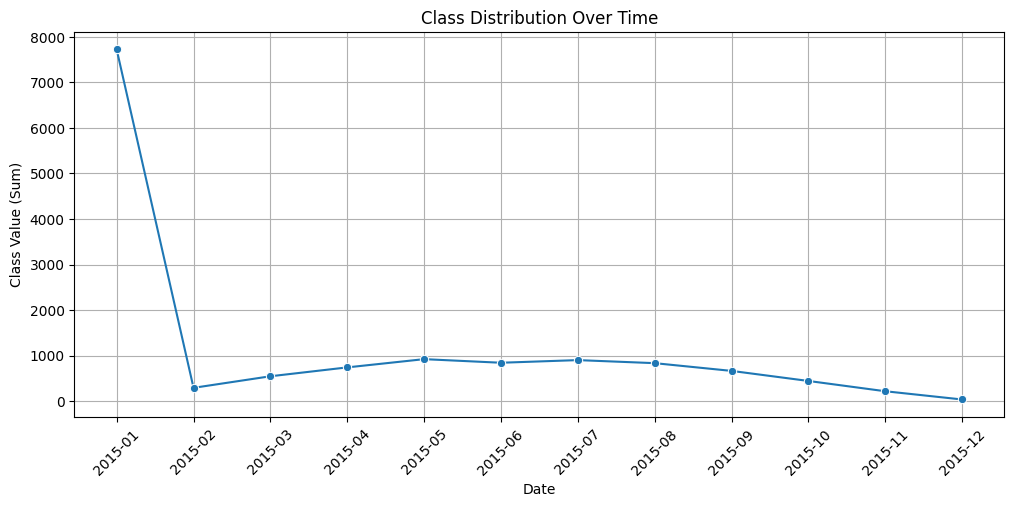

In [45]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=df_grouped['purchase_time'], y=df_grouped['class'], marker="o")

# Formatting
plt.xticks(rotation=45)  # Rotate dates for readability
plt.title("Class Distribution Over Time")
plt.xlabel("Date")
plt.ylabel("Class Value (Sum)")
plt.grid(True)

# Show plot
plt.show()